In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import queue

1b

In [16]:
class DBSCAN():
    def __init__(self):
        self.core_label = -1
        self.border_label = -2

    # Find all neighbour points at epsilon distance
    def get_neighbours(self, data, point_index, epsilon):
        neighbours = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm(data[i]-data[point_index]) <= epsilon:
            #if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                neighbours.append(i)
        return neighbours

    # Fit the data into the DBSCAN model
    def fit(self, data, Eps, MinPt):
        # initialize
        self.data=data
        pt_label = [0] * len(data)
        pt_neighbors = list()
        core_pts = list()
        border_pts = list()

        # Find the neighbours
        for i in range(len(data)):
            pt_neighbors.append(self.get_neighbours(data, i, Eps))

        # Assign Labels
        for i in range(len(pt_neighbors)):
            if (len(pt_neighbors[i]) >= MinPt):
                pt_label[i] = self.core_label
                core_pts.append(i)
            else:
                border_pts.append(i)

        for i in border_pts:
            for j in pt_neighbors[i]:
                if j in core_pts:
                    pt_label[i] = self.border_label
                    break

        # Assign points to a cluster

        cluster = 1

        for i in range(len(pt_label)):
            q = queue.Queue()
            #Check if the point is core
            if (pt_label[i] == self.core_label):
                pt_label[i] = cluster
                #All the neighbours of core points will fall in same cluster
                for x in pt_neighbors[i]:
                    if(pt_label[x] == self.core_label):
                        q.put(x)
                        pt_label[x] = cluster
                    elif(pt_label[x] == self.border_label):
                        pt_label[x] = cluster
                #Check for neighbour connectivity to core point        
                while not q.empty():
                    neighbors = pt_neighbors[q.get()]
                    for y in neighbors:
                        if (pt_label[y] == self.core_label):
                            pt_label[y] = cluster
                            q.put(y)
                        if (pt_label[y] == self.border_label):
                            pt_label[y] = cluster
                cluster += 1  # Move on to the next cluster
        self.labels=np.array(pt_label)
        self.num_clusters=cluster
        return pt_label, cluster

    # Visualize the clusters
    def Visualize(self):
       plt.scatter(self.data[self.labels == 1, 0], self.data[self.labels == 1, 1], s = 10, c = 'red', label = 'Cluster 1')
       plt.scatter(self.data[self.labels == 2, 0], self.data[self.labels == 2, 1], s = 10, c = 'blue', label = 'Cluster 2')
       if(self.num_clusters>3):
        plt.scatter(self.data[self.labels == 3, 0], self.data[self.labels == 3, 1], s = 10, c = 'green', label = 'Cluster 3')
       plt.title('Dataset')
       plt.legend()
       plt.show()



In [17]:
dataset1=pd.read_csv('dataset1.txt',header=None,sep='\s+')
dataset2=pd.read_csv('dataset2.txt',header=None,sep='\s+')

In [18]:
X_dataset1=dataset1.values
X_dataset2=dataset2.values

Dataset 1

1a

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_dataset1)

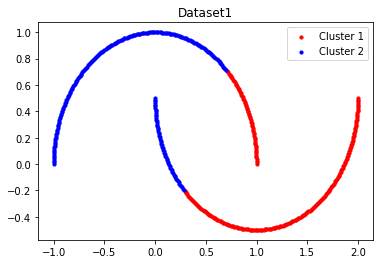

In [20]:
plt.scatter(X_dataset1[y_kmeans == 0, 0], X_dataset1[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_dataset1[y_kmeans == 1, 0], X_dataset1[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Dataset1')
plt.legend()
plt.show()

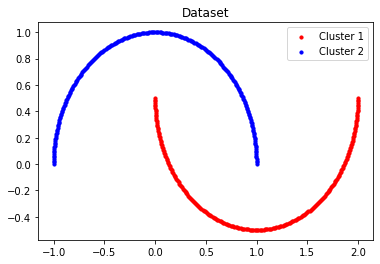

In [21]:
dbscan=DBSCAN()
labels,cluster=dbscan.fit(X_dataset1,0.25,4)
dbscan.Visualize()

1c
      We can see that DBSCAN is able to cluster the samples better than K-means because of the bias of k-means towards clustering spherical structures even after using K-means ++ it is unable to cluster properly whereas DBSCAN can easily cluster since it works based of density connectivity an since both the structures are not at all connected it can cluster them easily.

Dataset2 

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_dataset2)

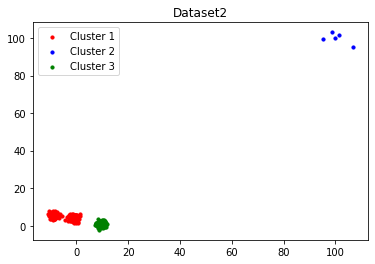

In [24]:
plt.scatter(X_dataset2[y_kmeans == 0, 0], X_dataset2[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_dataset2[y_kmeans == 1, 0], X_dataset2[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_dataset2[y_kmeans == 2, 0], X_dataset2[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.title('Dataset2')
plt.legend()
plt.show()

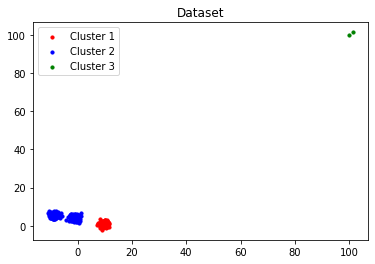

In [25]:
dbscan=DBSCAN()
labels,cluster=dbscan.fit(X_dataset2,3,2)
dbscan.Visualize()

1d)
If we look at specifically a and b we can see that in first case DBSCAN works better as based on density connectivity it can easily cluster properly whereas in K-means even if the centroid are initialized properly the section where both the curves are closer than other points it is most likely to cluster them as done for dataset 1.But if we look at b we can see that K-means is able to cluster properly even the cluster which is less densely populated it is able to cluster but in DBSCAN the less densely populated cluster became more smaller as DBSCAN is treating other points in that cluster as noise hence for DBSCAN to work properly density of clusters matters it might happen that a cluster that is sparse and less densely populated it can be amused as noise or outlier by DBSCAN

K-Means
Pros:
•	Perform on large dataset better compared to DBSCAN
•	Can perform on varying density datasets better
Cons:
•	Clusters formed are more or less spherical or convex in shape and must have same feature size.
•	Sensitive to K
•	Sensitive to outliers and noise
DBSCAN
 Pros:
•	Can cluster arbitrary shapes and one cluster surrounded by other
•	Robust to outlier detection
Cons:
•	Sensitive to min-points and epsilon
•	Difficult to cluster having different density and spare with varying density



In [26]:
 from sklearn.cluster import DBSCAN
 import numpy as np
 clustering = DBSCAN(eps=3, min_samples=2).fit(X_dataset2)

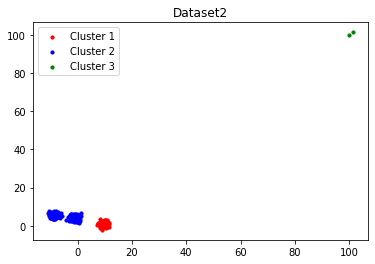

In [27]:
plt.scatter(X_dataset2[clustering.labels_ == 0, 0], X_dataset2[clustering.labels_ == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_dataset2[clustering.labels_ == 1, 0], X_dataset2[clustering.labels_ == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_dataset2[clustering.labels_ == 2, 0], X_dataset2[clustering.labels_ == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.title('Dataset2')
plt.legend()
plt.show()